# Extract data from output files

March 9, 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

import subprocess as sp
import sys
import os
import glob

from scipy import fftpack

In [3]:
sys.path.append('/global/u1/v/vpa/project/jpt_notebooks/Cosmology/Cosmo_GAN/LBANN/lbann_cosmogan/3_analysis/')
from modules_image_analysis import *

In [4]:
### Transformation functions for image pixel values
def f_transform(x):
    return 2.*x/(x + 4.) - 1.

def f_invtransform(s):
    return 4.*(1. + s)/(1. - s)

# plt.figure()
# plt.imshow(img)
# plt.figure()
# plt.imshow(f_transform(img))
# plt.figure()
# plt.imshow(f_invtransform(img))
# plt.figure()
# plt.imshow(f_invtransform(f_transform(img)))

## Extract image data 

In [5]:
data_dir = '/global/project/projectdirs/dasrepo/vpa/cosmogan/data/raw_data/'
fname='raw_train.npy'
samples = np.load(data_dir+fname, allow_pickle=True)
samples = samples.transpose(0,3,1,2)[:,0,:,:]
### Re-convert image values to those before re-scaling
# samples=f_invtransform(samples)
samples.shape


(17000, 128, 128)

In [6]:
fname='raw_val.npy'
samples = np.load(data_dir+fname, allow_pickle=True)
samples = samples.transpose(0,3,1,2)[:,0,:,:]
### Re-convert image values to those before re-scaling
# samples=f_invtransform(samples)
samples.shape

(2456, 128, 128)

### View single image

(128, 128)


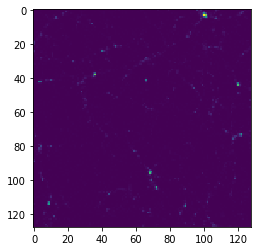

In [7]:
img=samples[2000]
print(img.shape)
plt.imshow(img)

### View grid of images

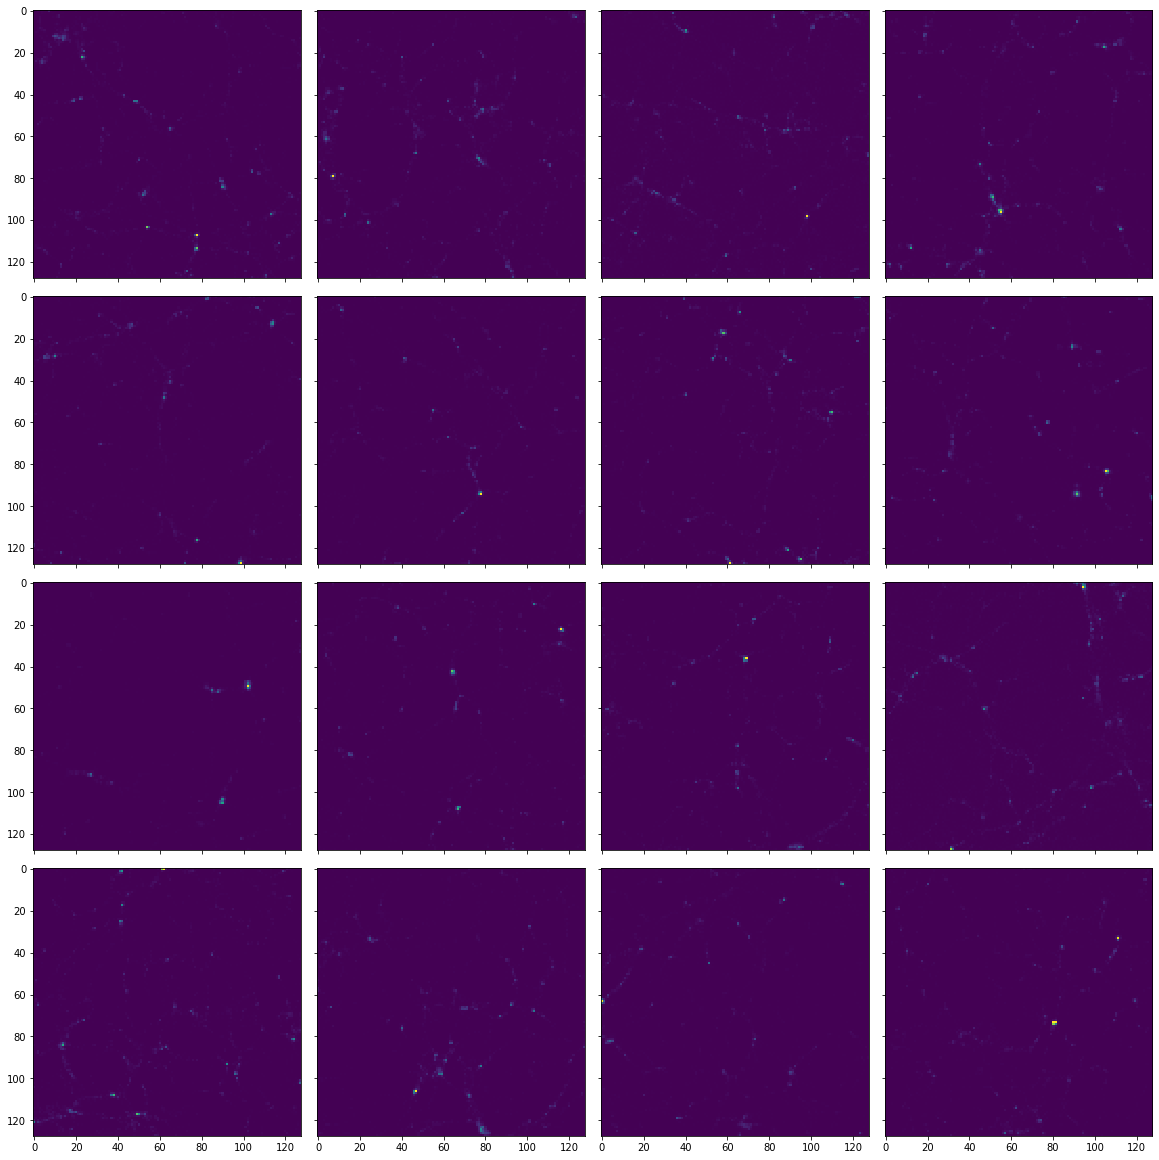

In [7]:
f_plot_grid(samples[:16],16)

## Plots of pixel values

In [8]:
### Get average values for each 2D image
size=samples.shape[0]
mean,err=np.mean(samples,axis=(1,2)),np.std(samples,axis=(1,2))/np.sqrt(size)
print("Mean of means",np.mean(mean))
print("Max values: %s, Min value: %s"%(np.max(samples),np.min(samples)))

Mean of means 1.001604459184777
Max values: 1479, Min value: 0


<ErrorbarContainer object of 3 artists>

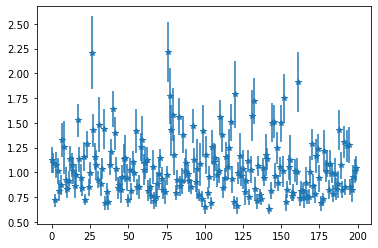

In [9]:
### Plot average values
size=200
plt.figure()
x,y,yerr=np.arange(size),mean[:size],err[:size]
plt.errorbar(x=x,y=y,yerr=yerr,marker='*',linestyle='')

### Pixel intensity histogram

array([107494,      0,      0,      0,      0,  36118,      0,      0,
         8778,      0,   3782,      0,   1995,   1249,      0,   1338,
          454,    607,    395,    386,    322,    298,    257,    239,
          128])

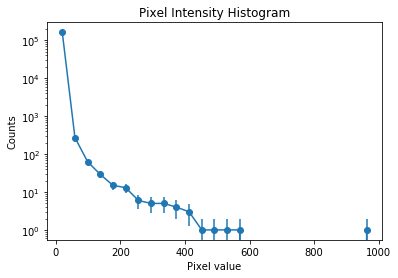

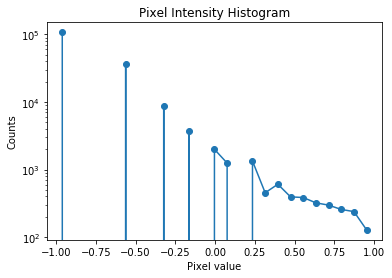

In [19]:
f_pixel_intensity(samples[:10])
f_pixel_intensity(f_transform(samples[:10]))
# f_pixel_intensity(f_invtransform(samples[:10]))

array([163420,    272,     63,     29,     15,     13,      6,      5,
            5,      4,      3,      1,      1,      1,      1,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            1])

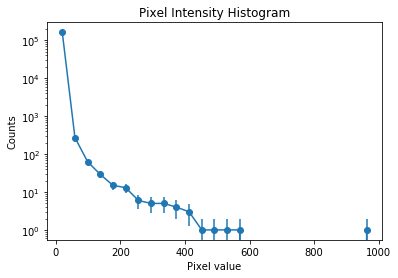

In [13]:
f_pixel_intensity(samples[:10])
# f_compare_pixel_intensity(samples[:10],samples[100:110])


## Spectrum

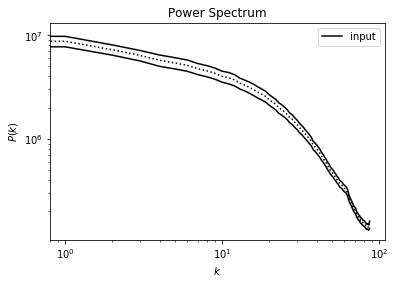

In [11]:
f_get_azimuthalAverage(img)
f_get_power_spectrum(img)
f_compute_spectrum(samples[:100])


(100, 128, 128) (100, 128, 128) (100, 88) (100, 88)
(88,) (88,)


1890890.3211390246

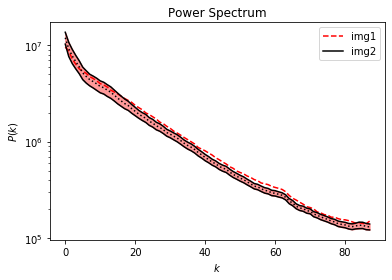

In [12]:
f_compare_spectrum(samples[:100],samples[100:200])